# Network Analysis project: Crime dataset

In [19]:
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [20]:
data_path = '..//Data//out.moreno_crime_crime'
role_path = '..//Data//rel.moreno_crime_crime.person.role'
name_path = '..//Data//ent.moreno_crime_crime.person.name'
gender_path = '..//Data//ent.moreno_crime_crime.person.sex'

In [21]:
# load data
data_df = pd.read_csv(data_path, sep=' ', names=["person", "crime"], index_col=False, dtype={'person':str, 'crime':str})
data_df["person"] = 'p' + data_df['person'] 
data_df['crime'] = 'c' + data_df['crime']
data_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [22]:
# load role attribute
role_df = pd.read_csv(role_path, sep=',', header=None)
# load gender attribute
gender_df =  pd.read_csv(gender_path, sep=' ', header=None)
# load gender attribute
name_df =  pd.read_csv(name_path, sep=' ', header=None)


In [23]:
# get set of people
people = data_df['person'].unique()
# get set of crimes
crimes = data_df['crime'].unique()

In [24]:
# create networkx graph
G=nx.Graph()

# # add nodes
for i in range(len(people)):
    G.add_node(people[i], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

for i in range(len(crimes)):
    G.add_node(crimes[i], bipartite=1)

# # add edges
for i in range(len(data_df)):
    G.add_edge(data_df['person'][i], data_df['crime'][i], role=role_df[0][i])



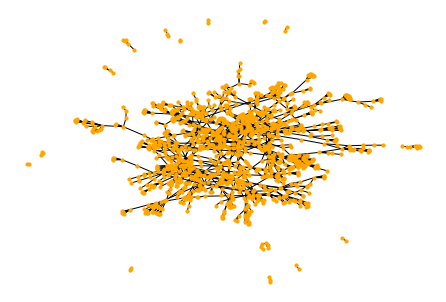

In [25]:
nx.draw(G, node_size=10, node_color='orange')

In [26]:
# print edge attributes
nx.get_edge_attributes(G,'role')

{('p1', 'c1'): 'Suspect',
 ('p1', 'c2'): 'Victim',
 ('p1', 'c3'): 'Victim',
 ('p1', 'c4'): 'Suspect',
 ('p2', 'c5'): 'Victim',
 ('p2', 'c6'): 'Suspect',
 ('p2', 'c7'): 'Victim',
 ('p2', 'c8'): 'Suspect',
 ('p2', 'c9'): 'Suspect',
 ('p2', 'c10'): 'Suspect',
 ('p2', 'c11'): 'Suspect',
 ('p2', 'c12'): 'Suspect',
 ('p2', 'c13'): 'Suspect',
 ('p2', 'c14'): 'Witness',
 ('p2', 'c15'): 'Suspect',
 ('p2', 'c16'): 'Suspect',
 ('p2', 'c17'): 'Suspect',
 ('p2', 'c18'): 'Suspect',
 ('p2', 'c19'): 'Victim',
 ('p2', 'c20'): 'Suspect',
 ('p2', 'c21'): 'Suspect',
 ('p2', 'c22'): 'Suspect',
 ('p2', 'c23'): 'Victim',
 ('p2', 'c24'): 'Suspect',
 ('p2', 'c25'): 'Suspect',
 ('p2', 'c26'): 'Suspect',
 ('p3', 'c27'): 'Suspect',
 ('p4', 'c24'): 'Suspect',
 ('p5', 'c19'): 'Victim',
 ('p6', 'c28'): 'Victim',
 ('p7', 'c29'): 'Suspect',
 ('p8', 'c30'): 'Suspect',
 ('p9', 'c31'): 'Victim',
 ('p10', 'c32'): 'Victim',
 ('p10', 'c33'): 'Victim',
 ('p10', 'c34'): 'Victim Suspect',
 ('p10', 'c35'): 'Suspect',
 ('p10', '

In [27]:
nx.is_connected(G)

False

In [28]:
# components in the graph sorted in descendent order
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# selecting the biggest component
G0 = G.subgraph(Gcc[0])

In [29]:
nx.get_edge_attributes(G0, 'role')

{('p1', 'c1'): 'Suspect',
 ('p1', 'c2'): 'Victim',
 ('p1', 'c3'): 'Victim',
 ('p1', 'c4'): 'Suspect',
 ('p2', 'c5'): 'Victim',
 ('p2', 'c6'): 'Suspect',
 ('p2', 'c7'): 'Victim',
 ('p2', 'c8'): 'Suspect',
 ('p2', 'c9'): 'Suspect',
 ('p2', 'c10'): 'Suspect',
 ('p2', 'c11'): 'Suspect',
 ('p2', 'c12'): 'Suspect',
 ('p2', 'c13'): 'Suspect',
 ('p2', 'c14'): 'Witness',
 ('p2', 'c15'): 'Suspect',
 ('p2', 'c16'): 'Suspect',
 ('p2', 'c17'): 'Suspect',
 ('p2', 'c18'): 'Suspect',
 ('p2', 'c19'): 'Victim',
 ('p2', 'c20'): 'Suspect',
 ('p2', 'c21'): 'Suspect',
 ('p2', 'c22'): 'Suspect',
 ('p2', 'c23'): 'Victim',
 ('p2', 'c24'): 'Suspect',
 ('p2', 'c25'): 'Suspect',
 ('p2', 'c26'): 'Suspect',
 ('p3', 'c27'): 'Suspect',
 ('p4', 'c24'): 'Suspect',
 ('p5', 'c19'): 'Victim',
 ('p6', 'c28'): 'Victim',
 ('p7', 'c29'): 'Suspect',
 ('p8', 'c30'): 'Suspect',
 ('p9', 'c31'): 'Victim',
 ('p10', 'c32'): 'Victim',
 ('p10', 'c33'): 'Victim',
 ('p10', 'c34'): 'Victim Suspect',
 ('p10', 'c35'): 'Suspect',
 ('p10', '

In [30]:
comp_list = []
for comp in Gcc:
    comp_len = len(comp)
    comp_list.append(comp_len)

f'Number of nodes for each components {comp_list} and number of components {len(comp_list)}'

'Number of nodes for each components [1263, 30, 18, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] and number of components 20'

In [31]:
# set of people nodes
top = nx.bipartite.sets(G0)[0]
# normal graph biggest comp
pos = nx.spring_layout(G0)
# bipartite graph BC
posB = nx.bipartite_layout(G0, top)
top

{'p1',
 'p10',
 'p100',
 'p101',
 'p102',
 'p103',
 'p105',
 'p106',
 'p107',
 'p108',
 'p109',
 'p11',
 'p110',
 'p111',
 'p112',
 'p113',
 'p114',
 'p115',
 'p116',
 'p117',
 'p118',
 'p119',
 'p12',
 'p120',
 'p121',
 'p122',
 'p123',
 'p124',
 'p125',
 'p126',
 'p128',
 'p129',
 'p13',
 'p130',
 'p131',
 'p132',
 'p133',
 'p134',
 'p136',
 'p137',
 'p138',
 'p139',
 'p14',
 'p142',
 'p143',
 'p144',
 'p147',
 'p148',
 'p149',
 'p15',
 'p150',
 'p151',
 'p152',
 'p154',
 'p155',
 'p156',
 'p159',
 'p16',
 'p160',
 'p161',
 'p162',
 'p164',
 'p165',
 'p166',
 'p167',
 'p168',
 'p169',
 'p17',
 'p170',
 'p171',
 'p173',
 'p174',
 'p175',
 'p176',
 'p177',
 'p178',
 'p179',
 'p18',
 'p180',
 'p181',
 'p183',
 'p184',
 'p185',
 'p186',
 'p188',
 'p189',
 'p19',
 'p190',
 'p191',
 'p192',
 'p193',
 'p194',
 'p195',
 'p196',
 'p197',
 'p199',
 'p2',
 'p20',
 'p200',
 'p201',
 'p202',
 'p203',
 'p204',
 'p205',
 'p207',
 'p208',
 'p209',
 'p21',
 'p211',
 'p212',
 'p213',
 'p214',
 'p215',

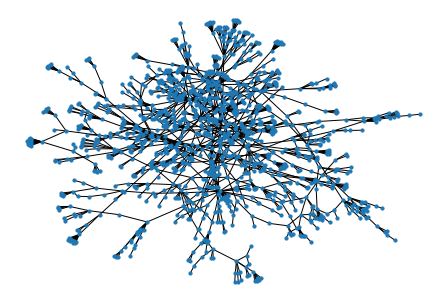

In [32]:
biggest_comp_graph = nx.draw(G0,pos,node_size=10)

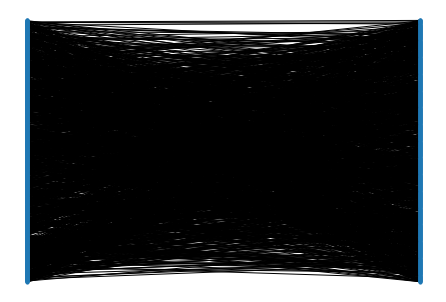

In [33]:
biggest_comp_graph = nx.draw(G0,posB,node_size=10)

In [34]:
# number of nodes in the all graph
num_person = len(set(data_df["person"]))
num_crime = len(set(data_df['crime']))
f'Number of person: {num_person} and number of crimes: {num_crime}'


'Number of person: 829 and number of crimes: 551'

In [35]:
# number of nodes in the biggest componnet
num_G0 = nx.bipartite.sets(G0)
num_p_list = [num_p for num_p in num_G0 if 'p' in num_p] 
num_p_list

[]

In [36]:
# number of people
print(len(num_G0[0]))
# number of crimes
print(len(num_G0[1]))


754
509


In [37]:
#print(G0.edges(data=True))

# Extract suspect edges
Created a new graph with only suspects to do further analysis (try projections).

In [38]:
suspect_edges = [(u,v) for u,v,e in G0.edges(data=True) if e['role'] == 'Suspect']
#print(suspect_edges)

In [39]:
for i in range(len(suspect_edges)):
    print(suspect_edges[i][0])

p1
p1
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p2
p3
p4
p7
p8
p10
p10
p10
p10
p15
p17
p17
p17
p17
p17
p18
p19
p20
p23
p24
p25
p26
p29
p34
p35
p36
p37
p37
p37
p37
p37
p37
p38
p39
p42
p43
p44
p45
p47
p51
p51
p51
p51
p53
p54
p54
p55
p56
p56
p56
p57
p61
p62
p62
p62
p62
p64
p65
p66
p68
p72
p73
p74
p74
p74
p74
p74
p74
p74
p75
p76
p77
p80
p82
p82
p87
p87
p87
p87
p88
p88
p88
p88
p93
p95
p97
p101
p103
p106
p106
p106
p109
p110
p111
p112
p112
p113
p114
p115
p115
p115
p115
p115
p115
p115
p115
p115
p117
p119
p119
p120
p123
p125
p129
p129
p129
p129
p130
p131
p137
p142
p147
p151
p152
p159
p166
p168
p170
p171
p171
p173
p174
p174
p176
p177
p178
p181
p185
p186
p188
p190
p191
p192
p201
p202
p202
p204
p209
p212
p214
p214
p214
p215
p217
p218
p220
p220
p220
p220
p220
p220
p220
p220
p220
p220
p220
p220
p220
p220
p222
p223
p225
p227
p228
p238
p242
p244
p245
p245
p245
p246
p247
p250
p253
p253
p255
p256
p257
p258
p262
p263
p264
p265
p278
p279
p280
p281
p283
p285
p286
p287
p289
p291
p291
p291
p292
p299
p3

# Projection of suspect graph
From the BCC extracted only the suspect edges and created a new graph that is not connected but still bipartite. From there projected onto people nodes.
- [ ] Figure out how to keep crime name as edge attribute

In [40]:
# suspects graph
GS = nx.Graph()

# add suspect people nodes
for i in range(len(suspect_edges)):
    GS.add_node(suspect_edges[i][0], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

# add crime nodes
for i in range(len(suspect_edges)):
    GS.add_node(suspect_edges[i][1],bipartite=1)

#add adges
GS.add_edges_from(suspect_edges)


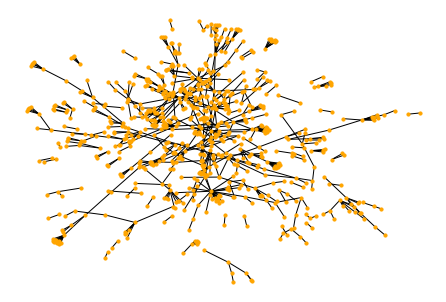

In [41]:
nx.draw(GS,pos,node_size = 10, node_color='orange')

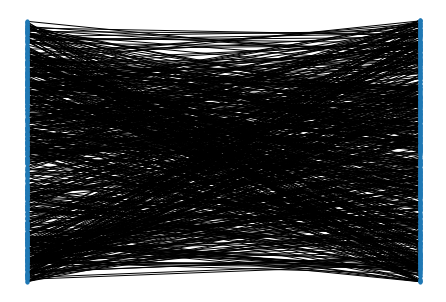

In [42]:
nx.draw(GS,posB,node_size=10)

In [43]:
nx.is_bipartite(GS)

True

In [44]:
people_nodes_GS = {n for n, d in GS.nodes(data=True) if d["bipartite"] == 0}
crime_nodes_GS = set(GS) - people_nodes_GS

In [45]:
# projection of suspect graph
weighted_suspect_graph = nx.bipartite.weighted_projected_graph(GS, people_nodes_GS, ratio=False)
list(weighted_suspect_graph.edges(data=True))[0:5]

[('p74', 'p609', {'weight': 1}),
 ('p74', 'p515', {'weight': 1}),
 ('p74', 'p636', {'weight': 1}),
 ('p74', 'p533', {'weight': 1}),
 ('p74', 'p72', {'weight': 1})]

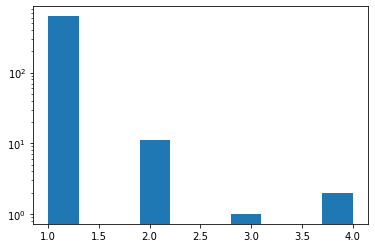

In [46]:
weights = list(nx.get_edge_attributes(weighted_suspect_graph, 'weight').values())

# plot weights
plt.hist(weights, bins = 10, log=True)
plt.show()

In [47]:
sus_nodes = pd.DataFrame(suspect_edges, columns=['node', 'crime']).iloc[:,0].unique()
sus_nodes = set(sus_nodes)

In [50]:
sus_nodes

{'p1',
 'p10',
 'p101',
 'p103',
 'p106',
 'p109',
 'p110',
 'p111',
 'p112',
 'p113',
 'p114',
 'p115',
 'p117',
 'p119',
 'p120',
 'p123',
 'p125',
 'p129',
 'p130',
 'p131',
 'p137',
 'p142',
 'p147',
 'p15',
 'p151',
 'p152',
 'p159',
 'p166',
 'p168',
 'p17',
 'p170',
 'p171',
 'p173',
 'p174',
 'p176',
 'p177',
 'p178',
 'p18',
 'p181',
 'p185',
 'p186',
 'p188',
 'p19',
 'p190',
 'p191',
 'p192',
 'p2',
 'p20',
 'p201',
 'p202',
 'p204',
 'p209',
 'p212',
 'p214',
 'p215',
 'p217',
 'p218',
 'p220',
 'p222',
 'p223',
 'p225',
 'p227',
 'p228',
 'p23',
 'p238',
 'p24',
 'p242',
 'p244',
 'p245',
 'p246',
 'p247',
 'p25',
 'p250',
 'p253',
 'p255',
 'p256',
 'p257',
 'p258',
 'p26',
 'p262',
 'p263',
 'p264',
 'p265',
 'p278',
 'p279',
 'p280',
 'p281',
 'p283',
 'p285',
 'p286',
 'p287',
 'p289',
 'p29',
 'p291',
 'p292',
 'p299',
 'p3',
 'p300',
 'p304',
 'p306',
 'p308',
 'p309',
 'p311',
 'p315',
 'p319',
 'p322',
 'p323',
 'p324',
 'p326',
 'p329',
 'p331',
 'p333',
 'p335',


In [17]:
GS2 = G0.subgraph(sus_nodes)

In [49]:
nx.number_of_edges(GS2)

0